In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import numpy as np
from adjustText import adjust_text
from scipy.optimize import curve_fit

In [17]:
input = "A.csv"
df = pd.read_csv(input, sep=",")
df = df.apply(pd.to_numeric, errors="coerce").dropna()

time = df[df.columns[0]].to_numpy()
freq = df[df.columns[1]].to_numpy()

# --- 高斯平滑 ---
sigma = 10
freq_smooth = gaussian_filter1d(freq, sigma=sigma)

In [18]:
'''
# === 3. 定義擬合模型 ===
def sine_func(t, A, f, phi, C):
    """A*sin(2πft + φ) + C"""
    return A * np.sin(2 * np.pi * f * t + phi) + C

# === 4. 初始猜測值 ===
# 幅度
A_guess = (np.max(freq_smooth) - np.min(freq_smooth)) / 2
# 頻率（先用FFT估一個初值，避免亂猜）
fft_freq = np.fft.fftfreq(len(time), d=(time[1] - time[0]))
fft_amp = np.abs(np.fft.fft(freq_smooth))
f_guess = abs(fft_freq[np.argmax(fft_amp[1:]) + 1])  # 跳過 DC 分量
# 相位與偏移
phi_guess = 0
C_guess = np.mean(freq_smooth)

initial_guess = [A_guess, f_guess, phi_guess, C_guess]
print("初始猜測值:", initial_guess)

# === 5. 進行擬合 ===
popt, pcov = curve_fit(sine_func, time, freq_smooth, p0=initial_guess)
A_fit, f_fit, phi_fit, C_fit = popt
print(f"\n擬合結果：\nA = {A_fit:.4f}, f = {f_fit:.4f}, phi = {phi_fit:.4f}, C = {C_fit:.4f}")

# === 6. 計算擬合曲線 ===
freq_fit = sine_func(time, *popt)

'''

'\n# === 3. 定義擬合模型 ===\ndef sine_func(t, A, f, phi, C):\n    """A*sin(2πft + φ) + C"""\n    return A * np.sin(2 * np.pi * f * t + phi) + C\n\n# === 4. 初始猜測值 ===\n# 幅度\nA_guess = (np.max(freq_smooth) - np.min(freq_smooth)) / 2\n# 頻率（先用FFT估一個初值，避免亂猜）\nfft_freq = np.fft.fftfreq(len(time), d=(time[1] - time[0]))\nfft_amp = np.abs(np.fft.fft(freq_smooth))\nf_guess = abs(fft_freq[np.argmax(fft_amp[1:]) + 1])  # 跳過 DC 分量\n# 相位與偏移\nphi_guess = 0\nC_guess = np.mean(freq_smooth)\n\ninitial_guess = [A_guess, f_guess, phi_guess, C_guess]\nprint("初始猜測值:", initial_guess)\n\n# === 5. 進行擬合 ===\npopt, pcov = curve_fit(sine_func, time, freq_smooth, p0=initial_guess)\nA_fit, f_fit, phi_fit, C_fit = popt\nprint(f"\n擬合結果：\nA = {A_fit:.4f}, f = {f_fit:.4f}, phi = {phi_fit:.4f}, C = {C_fit:.4f}")\n\n# === 6. 計算擬合曲線 ===\nfreq_fit = sine_func(time, *popt)\n\n'

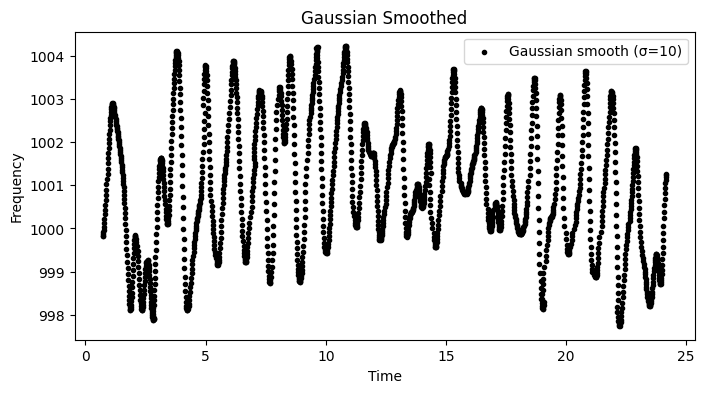

In [19]:
plt.figure(figsize=(8,4))
plt.scatter(time, freq_smooth, label=f"Gaussian smooth (σ={sigma})",marker='.',color='black')
#plt.plot(time, freq_fit, label="Sine fit", color='red')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Gaussian Smoothed")
plt.show()

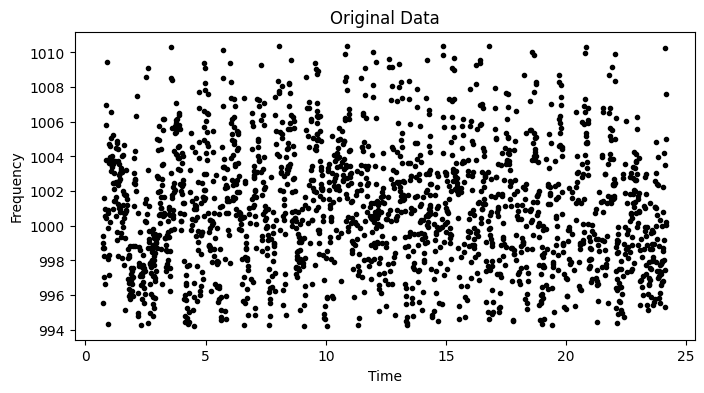

In [20]:
plt.figure(figsize=(8,4))
plt.scatter(time, freq, label=f"Gaussian smooth (σ={sigma})",marker='.',color='black')
#plt.plot(time, freq_fit, label="Sine fit", color='red')
#plt.legend()
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("Original Data")
plt.show()